# Data Analysis Tools
# Assignment: Running a Chi-Square Test of Independence

Following is the Python program I wrote to fulfill the second assignment of the [Data Analysis Tools online course](https://www.coursera.org/learn/data-analysis-tools/home/welcome).

I decided to use [Jupyter Notebook](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) as it is a pretty way to write code and present results.

As the [previous assignment](Analysis_Variance.ipynb) brought me to conclude my initial research question, I will look at a possible relationship between ethnicity (explanatory variable) and use of cannabis (response variable) from the NESARC database. As both variables are categoricals, the Chi-Square Test of Independence is the method to use.


In [1]:
# Magic command to insert the graph directly in the notebook
%matplotlib inline
# Load a useful Python libraries for handling data
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

## Data management

In [2]:
nesarc = pd.read_csv('nesarc_pds.csv', low_memory=False)

In [3]:
races = {1 : 'White', 
         2 : 'Black', 
         3 : 'American India \n Alaska', 
         4 : 'Asian \n Native Hawaiian \n Pacific',
         5 : 'Hispanic or Latino'}
subnesarc = (nesarc[['S3BQ1A5', 'ETHRACE2A']]
             .assign(S3BQ1A5=lambda x: pd.to_numeric(x['S3BQ1A5'].replace((2, 9), (0, np.nan)), errors='coerce'))
             .assign(ethnicity=lambda x: pd.Categorical(x['ETHRACE2A'].map(races)),
                     use_cannabis=lambda x: pd.Categorical(x['S3BQ1A5']))
             .dropna())
subnesarc.use_cannabis.cat.rename_categories(('No', 'Yes'), inplace=True)

First, the distribution of both the use of cannabis and the ethnicity will be shown.

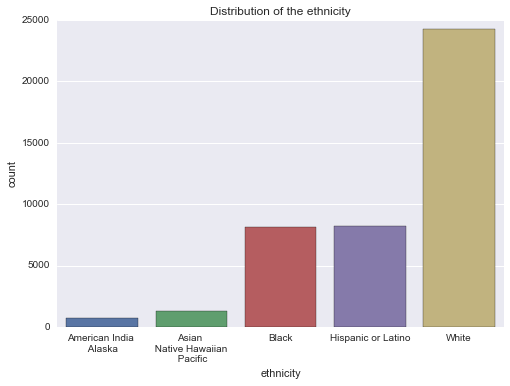

In [4]:
g = sns.countplot(subnesarc['ethnicity'])

_ = plt.title('Distribution of the ethnicity')

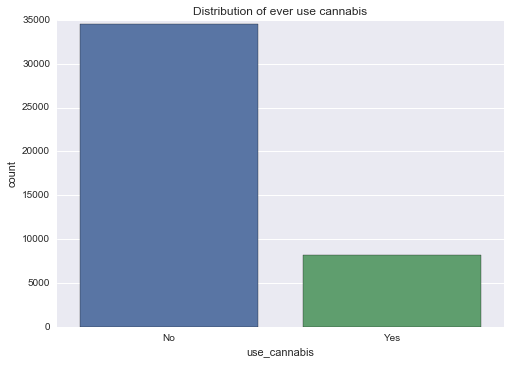

In [5]:
g = sns.countplot(subnesarc['use_cannabis'])
_ = plt.title('Distribution of ever use cannabis')

## Variance analysis

Now that the univariate distribution as be plotted and described, the bivariate graphics will be plotted in order to test our research hypothesis.

From the bivariate graphic below, it seems that there are some differences. For example American Indian versus Asian seems quite different.

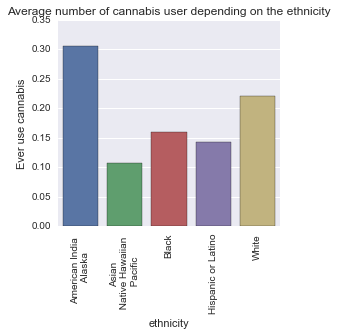

In [6]:
g = sns.factorplot(x='ethnicity', y='S3BQ1A5', data=subnesarc, 
                   kind="bar", ci=None)
g.set_xticklabels(rotation=90)
plt.ylabel('Ever use cannabis')
_ = plt.title('Average number of cannabis user depending on the ethnicity')

In [7]:
ct1 = pd.crosstab(subnesarc.use_cannabis, subnesarc.ethnicity)
display(Markdown("Contingency table of observed counts"))
ct1

Contingency table of observed counts

ethnicity,American India Alaska,Asian Native Hawaiian Pacific,Black,Hispanic or Latino,White
use_cannabis,,,,,
No,482,1186,6847,7077,18961
Yes,212,142,1303,1174,5341


In [8]:
# Note: normalize keyword is available starting from pandas version 0.18.1
ct2 = ct1/ct1.sum(axis=0)
display(Markdown("Contingency table of observed counts normalized over each columns"))
ct2

Contingency table of observed counts normalized over each columns

ethnicity,American India Alaska,Asian Native Hawaiian Pacific,Black,Hispanic or Latino,White
use_cannabis,,,,,
No,0.694524,0.893072,0.840123,0.857714,0.780224
Yes,0.305476,0.106928,0.159877,0.142286,0.219776


The Chi-Square test will be applied on the all data to test the following hypothesis :

- The null hypothesis is *There is no relationship between the use of cannabis and the ethnicity*.
- The alternate hypothesis is *There is a relationship between the use of cannabis and the ethnicity*.

In [9]:
stats.chi2_contingency(ct1)

(427.16448568948812,
 3.7497669790156457e-91,
 4,
 array([[   561.25879462,   1073.99377414,   6591.15155061,   6672.83330603,
          19653.76257461],
        [   132.74120538,    254.00622586,   1558.84844939,   1578.16669397,
           4648.23742539]]))

The p-value of 3.7e-91 confirm that the null hypothesis can be safetly rejected.

The next obvious questions is which ethnic groups have a statistically significant difference regarding the use of cannabis. For that, the Chi-Square test will be performed on each pair of group thanks to the following code.

In [10]:
list_races = list(races.keys())
p_values = dict()
for i in range(len(list_races)):
    for j in range(i+1, len(list_races)):
        race1 = races[list_races[i]]
        race2 = races[list_races[j]]
        subethnicity = subnesarc.ETHRACE2A.map(dict(((list_races[i], race1),(list_races[j], race2))))
        comparison = pd.crosstab(subnesarc.use_cannabis, subethnicity)
        display(Markdown("Crosstable to compare {} and {}".format(race1, race2)))
        display(comparison)
        display(comparison/comparison.sum(axis=0))
        
        chi_square, p, _, expected_counts = stats.chi2_contingency(comparison)
        p_values[(race1, race2)] = p

Crosstable to compare White and Black

ETHRACE2A,Black,White
use_cannabis,,
No,6847,18961
Yes,1303,5341


ETHRACE2A,Black,White
use_cannabis,,
No,0.840123,0.780224
Yes,0.159877,0.219776


Crosstable to compare White and American India 
 Alaska

ETHRACE2A,American India Alaska,White
use_cannabis,,
No,482,18961
Yes,212,5341


ETHRACE2A,American India Alaska,White
use_cannabis,,
No,0.694524,0.780224
Yes,0.305476,0.219776


Crosstable to compare White and Asian 
 Native Hawaiian 
 Pacific

ETHRACE2A,Asian Native Hawaiian Pacific,White
use_cannabis,,
No,1186,18961
Yes,142,5341


ETHRACE2A,Asian Native Hawaiian Pacific,White
use_cannabis,,
No,0.893072,0.780224
Yes,0.106928,0.219776


Crosstable to compare White and Hispanic or Latino

ETHRACE2A,Hispanic or Latino,White
use_cannabis,,
No,7077,18961
Yes,1174,5341


ETHRACE2A,Hispanic or Latino,White
use_cannabis,,
No,0.857714,0.780224
Yes,0.142286,0.219776


Crosstable to compare Black and American India 
 Alaska

ETHRACE2A,American India Alaska,Black
use_cannabis,,
No,482,6847
Yes,212,1303


ETHRACE2A,American India Alaska,Black
use_cannabis,,
No,0.694524,0.840123
Yes,0.305476,0.159877


Crosstable to compare Black and Asian 
 Native Hawaiian 
 Pacific

ETHRACE2A,Asian Native Hawaiian Pacific,Black
use_cannabis,,
No,1186,6847
Yes,142,1303


ETHRACE2A,Asian Native Hawaiian Pacific,Black
use_cannabis,,
No,0.893072,0.840123
Yes,0.106928,0.159877


Crosstable to compare Black and Hispanic or Latino

ETHRACE2A,Black,Hispanic or Latino
use_cannabis,,
No,6847,7077
Yes,1303,1174


ETHRACE2A,Black,Hispanic or Latino
use_cannabis,,
No,0.840123,0.857714
Yes,0.159877,0.142286


Crosstable to compare American India 
 Alaska and Asian 
 Native Hawaiian 
 Pacific

ETHRACE2A,American India Alaska,Asian Native Hawaiian Pacific
use_cannabis,,
No,482,1186
Yes,212,142


ETHRACE2A,American India Alaska,Asian Native Hawaiian Pacific
use_cannabis,,
No,0.694524,0.893072
Yes,0.305476,0.106928


Crosstable to compare American India 
 Alaska and Hispanic or Latino

ETHRACE2A,American India Alaska,Hispanic or Latino
use_cannabis,,
No,482,7077
Yes,212,1174


ETHRACE2A,American India Alaska,Hispanic or Latino
use_cannabis,,
No,0.694524,0.857714
Yes,0.305476,0.142286


Crosstable to compare Asian 
 Native Hawaiian 
 Pacific and Hispanic or Latino

ETHRACE2A,Asian Native Hawaiian Pacific,Hispanic or Latino
use_cannabis,,
No,1186,7077
Yes,142,1174


ETHRACE2A,Asian Native Hawaiian Pacific,Hispanic or Latino
use_cannabis,,
No,0.893072,0.857714
Yes,0.106928,0.142286


If we put together all p-values results and test them against our threshold of 0.005, we got the table below.

The threshold is the standard 0.05 threshold divided by the number of pairs in the explanatory variables (here 10).

In [11]:
df = pd.DataFrame(p_values, index=['p-value', ])

(df.stack(level=[0, 1])['p-value']
   .rename('p-value')
   .to_frame()
   .assign(Ha=lambda x: x['p-value'] < 0.05 / len(p_values)))

p-value  \
American India \n Alaska            Asian \n Native Hawaiian \n Pacific  1.364517e-28   
                                    Hispanic or Latino                   6.938375e-30   
Asian \n Native Hawaiian \n Pacific Hispanic or Latino                   6.016908e-04   
Black                               American India \n Alaska             2.474718e-22   
                                    Asian \n Native Hawaiian \n Pacific  7.953423e-07   
                                    Hispanic or Latino                   1.784392e-03   
White                               American India \n Alaska             1.103488e-07   
                                    Asian \n Native Hawaiian \n Pacific  2.230204e-22   
                                    Black                                5.133717e-31   
                                    Hispanic or Latino                   4.477664e-52   

                                                                           Ha  
American India \n Alaska            Asian \n Native Hawaiian \n Pacific  True  
                                    Hispanic or Latino                   True  
Asian \n Native Hawaiian \n Pacific Hispanic or Latino                   True  
Black                               American India \n Alaska             True  
                                    Asian \n Native Hawaiian \n Pacific  True  
                                    Hispanic or Latino                   True  
White                               American India \n Alaska             True  
                                    Asian \n Native Hawaiian \n Pacific  True  
                                    Black                                True  
                                    Hispanic or Latino                   True

In this particular case, we can conclude that all ethnic group have a significant relationship with the use of cannabis.

> If you are interested into data sciences, follow me on [Tumblr](http://fcollonval.tumblr.com/).